<a href="https://colab.research.google.com/github/Sirius724/Computational-Physics/blob/main/%EC%A0%84%EC%82%B0%EB%AC%BC%EB%A6%AC%ED%95%99_5_decay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Colab Notebooks/전산 물리학"
data = "/content/drive/MyDrive/Colab Notebooks/전산 물리학/data"
import os
import numpy as np ; import math as mt
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

if not os.path.isdir(data): 
    os.makedirs(data)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Radioactive Decay

In [22]:
dt = 1
t = np.arange(0,51,dt)
N,EX = np.zeros(len(t)), np.zeros(len(t))

N[0] = 100
lam = 0.1
def exact(t):
    ex = N[0]*mt.exp(-lam*t)
    return ex

def f(t,n): # 미분 방정식 대입
    fx1 = -lam*n
    return fx1

EX[0]=exact(t[0])

save = open(f"{data}/decay_runge4th.txt","w+")
save.write(f"{t[0]:.4f}\t{N[0]:.4f}\t{EX[0]:.4f}\n")
for i in range(len(t)-1):
    k1 = dx*f(t[i],N[i]) # k1 = dx*f(xn,yn)
    k2 = dx*f(t[i]+dx/2,N[i]+k1/2) # k2 = dx *f(xn+dx/2,yn+k1/2)
    k3 = dx*f(t[i]+dx/2,N[i]+k2/2) # k3 = dx *f(xn+dx/2,yn+k2/2)
    k4 = dx*f(t[i]+dx,N[i]+k3) # k4 = dx * f(xn+dx,yn+k3)
    N[i+1]= N[i]+(k1+2*k2+2*k3+k4)/6
    EX[i+1]=exact(t[i+1])
    save.write(f"{t[i+1]:.4f}\t{N[i+1]:.4f}\t{EX[i+1]:.4f}\n")    

save.close()

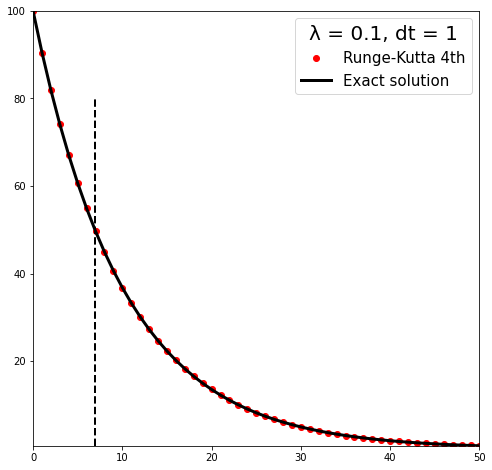

In [50]:
result = pd.read_csv("%s/decay_runge4th.txt"%data, sep='\t',header=None,engine="python")

plt.figure(figsize=(8,8))
plt.xlim(result[0].min(),result[0].max())
plt.ylim(result[2].min(),result[2].max() ) 
plt.plot(result[0],result[1],"ro",linewidth=5,label = "Runge-Kutta 4th")
plt.plot(result[0],result[2],"k",linewidth=3,label = "Exact solution")
half = mt.log(2)/lam
plt.axvline(x=half,ymin=0,ymax=0.8,color='black', linestyle='--', linewidth=2)
plt.legend(title=f"\u03BB = {lam}, dt = {dt}",fontsize=15, title_fontsize=20)

## Countinuous decay
- Using first-order differential equation 
$$dN_A/dt = -\lambda_A \cdot N_A(t) \\
dN_B/dt = -\lambda_B \cdot N_B(t)+\lambda_A \cdot N_A(t) \\
dN_C/dt = \lambda_B \cdot N_B(t)
$$


In [188]:
# Use Euler method 
dt = 1000
t = np.arange(0,5e5,dt)
Na, Nb, Nc = np.zeros(len(t)),np.zeros(len(t)),np.zeros(len(t))

Na[0] = 1.0e5
Nb[0] = Nc[0] = 0
half_A = 5013
half_b = 138376

lab1= mt.log(2)/half_A
lab2 = mt.log(2)/half_b

def fna(na):
    fn1 = -lab1*na
    return fn1

def fnb(na,nb):
    fn2 = lab1*na-lab2*nb
    return fn2

def fnc(nb):
    fn3 = lab2*nb
    return fn3

save = open(f"{data}/continue_decay_euler.txt","w+")
save.write(f"{t[0]:.4f}\t{Na[0]:.4f}\t{Nb[0]:.4f}\t{Nc[0]:.4f}\n")
for i in range(len(t)-1):
    Na[i+1] = Na[i]+fna(Na[i])*dt
    Nb[i+1] = Nb[i]+fnb(Na[i],Nb[i])*dt
    Nc[i+1] = Nc[i]+fnc(Nb[i])*dt
    save.write(f"{t[i+1]:.4f}\t{Na[i+1]:.4f}\t{Nb[i+1]:.4f}\t{Nc[i+1]:.4f}\n")

save.close()


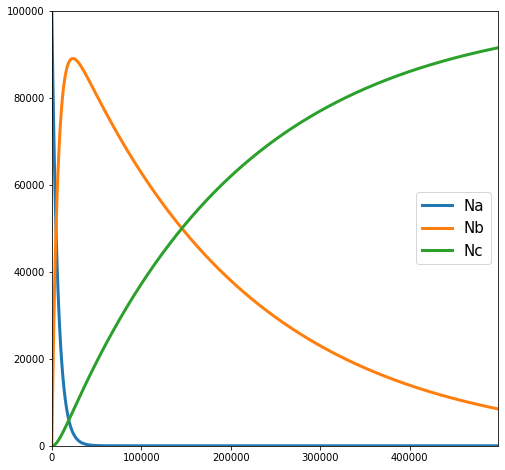

In [189]:
result = pd.read_csv("%s/continue_decay_euler.txt"%data, sep='\t',header=None,engine="python")

plt.figure(figsize=(8,8))
plt.xlim(result[0].min(),result[0].max())
plt.ylim(0,result[1].max() ) 
plt.plot(result[0],result[1],linewidth=3,label = "Na")
plt.plot(result[0],result[2],linewidth=3,label = "Nb")
plt.plot(result[0],result[3],linewidth=3,label = "Nc")
#half = mt.log(2)/lam
#plt.axvline(x=half,ymin=0,ymax=0.8,color='black', linestyle='--', linewidth=2)
plt.legend(title=f"",fontsize=15, title_fontsize=20)

In [190]:
dt = 1000
t = np.arange(0,5e5,dt)
Na, Nb, Nc = np.zeros(len(t)),np.zeros(len(t)),np.zeros(len(t))

Na[0] = 1.0e5
Nb[0] = Nc[0] = 0
half_A = 5013
half_b = 138376

lab1= mt.log(2)/half_A
lab2 = mt.log(2)/half_b

def fna(t,na):
    fn1 = -lab1*na
    return fn1

def fnb(na,nb):
    fn2 = lab1*na-lab2*nb
    return fn2

def fnc(nb,nc):
    fn3 = lab2*nb
    return fn3

save = open(f"{data}/continue_decay_runge2nd.txt","w+")
save.write(f"{t[0]:.4f}\t{Na[0]:.4f}\t{Nb[0]:.4f}\t{Nc[0]:.4f}\n")

for i in range(len(t)-1):
    k1 = dt*fna(t[i],Na[i])
    l1 = dt*fnb(Na[i],Nb[i])
    m1 = dt*fnc(Nb[i],Nc[i])
    k2 = dt*fna(t[i]+dt/2,Na[i]+k1/2)
    l2 = dt*fnb(Na[i]+k1/2,Nb[i]+l1/2)
    m2 = dt*fnc(Nb[i]+l1/2,Nc[i]+m1/2)
    Na[i+1]= Na[i]+(k1+k2)/2.0
    Nb[i+1]= Nb[i]+(l1+l2)/2.0
    Nc[i+1]= Nc[i]+(m1+m2)/2.0
    save.write(f"{t[i+1]:.4f}\t{Na[i+1]:.4f}\t{Nb[i+1]:.4f}\t{Nc[i+1]:.4f}\n")
    
save.close()



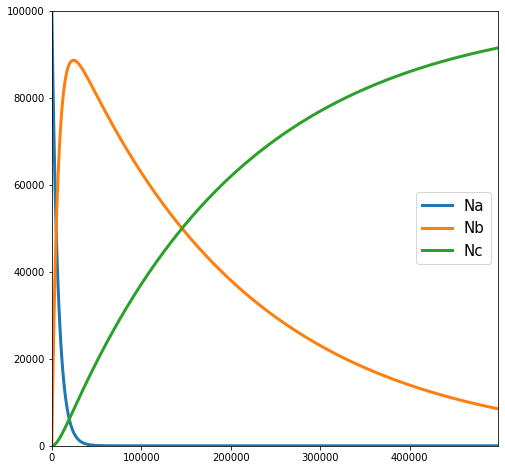

In [191]:
result = pd.read_csv("%s/continue_decay_runge2nd.txt"%data, sep='\t',header=None,engine="python")

plt.figure(figsize=(8,8))
plt.xlim(result[0].min(),result[0].max())
plt.ylim(0,result[1].max() ) 
plt.plot(result[0],result[1],linewidth=3,label = "Na")
plt.plot(result[0],result[2],linewidth=3,label = "Nb")
plt.plot(result[0],result[3],linewidth=3,label = "Nc")
#half = mt.log(2)/lam
#plt.axvline(x=half,ymin=0,ymax=0.8,color='black', linestyle='--', linewidth=2)
plt.legend(title=f"",fontsize=15, title_fontsize=20)

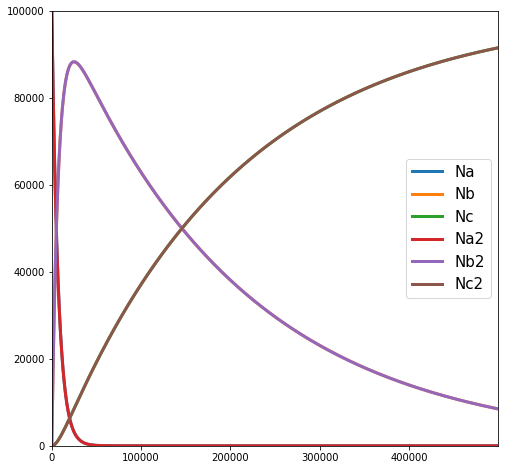

In [158]:
result = pd.read_csv("%s/continue_decay_euler.txt"%data, sep='\t',header=None,engine="python")

plt.figure(figsize=(8,8))
plt.xlim(result[0].min(),result[0].max())
plt.ylim(0,result[1].max() ) 
plt.plot(result[0],result[1],linewidth=3,label = "Na")
plt.plot(result[0],result[2],linewidth=3,label = "Nb")
plt.plot(result[0],result[3],linewidth=3,label = "Nc")

result2 = pd.read_csv("%s/continue_decay_runge2nd.txt"%data, sep='\t',header=None,engine="python")
plt.plot(result2[0],result2[1],linewidth=3,label = "Na2")
plt.plot(result2[0],result2[2],linewidth=3,label = "Nb2")
plt.plot(result2[0],result2[3],linewidth=3,label = "Nc2")
#half = mt.log(2)/lam
#plt.axvline(x=half,ymin=0,ymax=0.8,color='black', linestyle='--', linewidth=2)
plt.legend(title=f"",fontsize=15, title_fontsize=20)

In [192]:
# Use Runge-Kutta 4th method 

dt = 1000
t = np.arange(0,5e5,dt)
Na, Nb, Nc = np.zeros(len(t)),np.zeros(len(t)),np.zeros(len(t))

Na[0] = 1.0e5
Nb[0] = Nc[0] = 0
half_A = 5013
half_b = 138376

lab1= mt.log(2)/half_A
lab2 = mt.log(2)/half_b

def fna(t,na):
    fn1 = -lab1*na
    return fn1

def fnb(na,nb):
    fn2 = lab1*na-lab2*nb
    return fn2

def fnc(nb,nc):
    fn3 = lab2*nb
    return fn3

save = open(f"{data}/continue_decay_runge4th.txt","w+")
save.write(f"{t[0]:.4f}\t{Na[0]:.4f}\t{Nb[0]:.4f}\t{Nc[0]:.4f}\n")

for i in range(len(t)-1):
    k1 = dt*fna(t[i],Na[i]) # k1 = dx*f(xn,yn)
    l1 = dt*fnb(Na[i],Nb[i]) # k1 = dx*f(xn,yn)
    m1 = dt*fnc(Nb[i],Nc[i]) # k1 = dx*f(xn,yn)
    
    k2 = dt*fna(t[i]+dt/2,Na[i]+k1/2) # k2 = dx *f(xn+dx/2,yn+k1/2)
    l2 = dt*fnb(Na[i]+k1/2,Nb[i]+l1/2) # k2 = dx *f(xn+dx/2,yn+k1/2)
    m2 = dt*fnc(Nb[i]+l1/2,Nc[i]+m1/2) # k2 = dx *f(xn+dx/2,yn+k1/2)
    
    k3 = dt*fna(t[i]+dt/2,Na[i]+k2/2) # k3 = dx *f(xn+dx/2,yn+k2/2)
    l3 = dt*fnb(Na[i]+k2/2,Nb[i]+l2/2) # k3 = dx *f(xn+dx/2,yn+k2/2)
    m3 = dt*fnc(Nb[i]+l2/2,Nc[i]+m2/2) # k3 = dx *f(xn+dx/2,yn+k2/2)
    
    k4 = dt*fna(t[i]+dt,Na[i]+k3) # k4 = dx * f(xn+dx,yn+k3)
    l4 = dt*fnb(Na[i]+k3,Nb[i]+l3) # k4 = dx * f(xn+dx,yn+k3)
    m4 = dt*fnc(Nb[i]+l3,Nc[i]+m3) # k4 = dx * f(xn+dx,yn+k3)
    
    Na[i+1]= Na[i]+(k1+2*k2+2*k3+k4)/6
    Nb[i+1]= Nb[i]+(l1+2*l2+2*l3+l4)/6
    Nc[i+1]= Nc[i]+(m1+2*m2+2*m3+m4)/6

    save.write(f"{t[i+1]:.4f}\t{Na[i+1]:.4f}\t{Nb[i+1]:.4f}\t{Nc[i+1]:.4f}\n")
    
save.close()

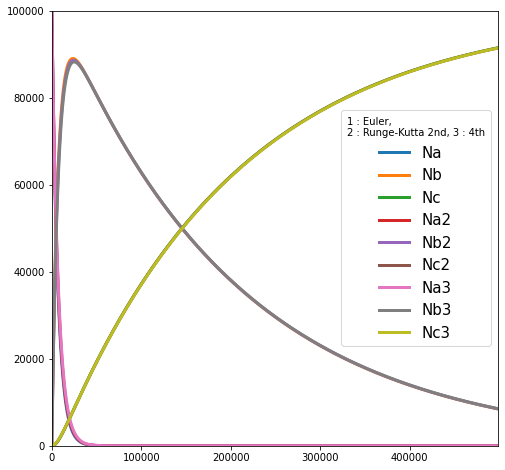

In [193]:
result = pd.read_csv("%s/continue_decay_euler.txt"%data, sep='\t',header=None,engine="python")

plt.figure(figsize=(8,8))
plt.xlim(result[0].min(),result[0].max())
plt.ylim(0,result[1].max() ) 
plt.plot(result[0],result[1],linewidth=3,label = "Na")
plt.plot(result[0],result[2],linewidth=3,label = "Nb")
plt.plot(result[0],result[3],linewidth=3,label = "Nc")

result2 = pd.read_csv("%s/continue_decay_runge2nd.txt"%data, sep='\t',header=None,engine="python")
plt.plot(result2[0],result2[1],linewidth=3,label = "Na2")
plt.plot(result2[0],result2[2],linewidth=3,label = "Nb2")
plt.plot(result2[0],result2[3],linewidth=3,label = "Nc2")

result3 = pd.read_csv("%s/continue_decay_runge4th.txt"%data, sep='\t',header=None,engine="python")
plt.plot(result3[0],result3[1],linewidth=3,label = "Na3")
plt.plot(result3[0],result3[2],linewidth=3,label = "Nb3")
plt.plot(result3[0],result3[3],linewidth=3,label = "Nc3")
plt.legend(title=f"1 : Euler, \n2 : Runge-Kutta 2nd, 3 : 4th",fontsize=15, title_fontsize=10)


### 연습문제 P95 - 6.2

In [186]:
# Use Euler method 
dt = 20
t = np.arange(0,1e6,dt)
Na, Nb, Nc, Nd = np.zeros(len(t)),np.zeros(len(t)),np.zeros(len(t)),np.zeros(len(t))

Na[0] = 10000
Nb[0] = Nc[0] = Nd[0] = 0
half_a = 18.1
half_b = 6564
half_c = 2.342*1e7
lab1 = mt.log(2)/half_a
lab2 = mt.log(2)/half_b
lab3 = mt.log(2)/half_c

def fna(t,na):
    fn1 = -lab1*na
    return fn1

def fnb(na,nb):
    fn2 = lab1*na-lab2*nb
    return fn2

def fnc(nb,nc):
    fn3 = lab2*nb-lab3*nc
    return fn3

def fnd(nc):
    fn4 = lab3*nc
    return fn4

save = open(f"{data}/practice_P95.txt","w+")
save.write(f"{t[0]:.4f}\t{Na[0]:.4f}\t{Nb[0]:.4f}\t{Nc[0]:.4f}\t{Nd[0]:.4f}\n")

print(lab1)
print(lab2)
print(lab3)
for i in range(len(t)-1):
    Na[i+1] = Na[i]+fna(t[i],Na[i])*dt
    Nb[i+1] = Nb[i]+fnb(Na[i],Nb[i])*dt
    Nc[i+1] = Nc[i]+fnc(Nb[i],Nc[i])*dt
    Nd[i+1] = Nd[i]+fnd(Nc[i])*dt
    save.write(f"{t[i+1]:.4f}\t{Na[i+1]:.4f}\t{Nb[i+1]:.4f}\t{Nc[i+1]:.4f}\t{Nd[i+1]:.4f}\n")

save.close()


0.03829542434032847
0.00010559829076172232
2.959637833304634e-08


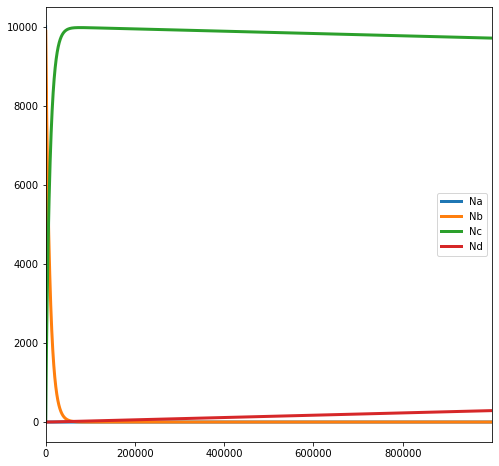

In [187]:
result = pd.read_csv("%s/practice_P95.txt"%data, sep='\t',header=None,engine="python")

plt.figure(figsize=(8,8))
plt.xlim(result[0].min(),result[0].max())
plt.plot(result[0],result[1],linewidth=3,label = "Na")
plt.plot(result[0],result[2],linewidth=3,label = "Nb")
plt.plot(result[0],result[3],linewidth=3,label = "Nc")
plt.plot(result[0],result[4],linewidth=3,label = "Nd")
plt.legend()

In [200]:
# Use Runge-Kutta 4th method
dt = 20
t = np.arange(0,1e6,dt)
Na, Nb, Nc, Nd = np.zeros(len(t)),np.zeros(len(t)),np.zeros(len(t)),np.zeros(len(t))

Na[0] = 10000
Nb[0] = Nc[0] = Nd[0] = 0
half_a = 18.1
half_b = 6564
half_c = 2.342*1e7
lab1 = mt.log(2)/half_a
lab2 = mt.log(2)/half_b
lab3 = mt.log(2)/half_c

def fna(t,na):
    fn1 = -lab1*na
    return fn1

def fnb(na,nb):
    fn2 = lab1*na-lab2*nb
    return fn2

def fnc(nb,nc):
    fn3 = lab2*nb-lab3*nc
    return fn3

def fnd(nc):
    fn4 = lab3*nc
    return fn4

save = open(f"{data}/practice_P95_4th.txt","w+")
save.write(f"{t[0]:.4f}\t{Na[0]:.4f}\t{Nb[0]:.4f}\t{Nc[0]:.4f}\t{Nd[0]:.4f}\n")

print(lab1)
print(lab2)
print(lab3)
for i in range(len(t)-1):
    k1 = dt*fna(t[i],Na[i]) # k1 = dx*f(xn,yn)
    l1 = dt*fnb(Na[i],Nb[i]) # k1 = dx*f(xn,yn)
    m1 = dt*fnc(Nb[i],Nc[i]) # k1 = dx*f(xn,yn)
    s1 = dt*fnd(Nc[i])

    k2 = dt*fna(t[i]+dt/2,Na[i]+k1/2) # k2 = dx *f(xn+dx/2,yn+k1/2)
    l2 = dt*fnb(Na[i]+k1/2,Nb[i]+l1/2) # k2 = dx *f(xn+dx/2,yn+k1/2)
    m2 = dt*fnc(Nb[i]+l1/2,Nc[i]+m1/2) # k2 = dx *f(xn+dx/2,yn+k1/2)
    s2 = dt*fnd(Nc[i]+m1/2)

    k3 = dt*fna(t[i]+dt/2,Na[i]+k2/2) # k3 = dx *f(xn+dx/2,yn+k2/2)
    l3 = dt*fnb(Na[i]+k2/2,Nb[i]+l2/2) # k3 = dx *f(xn+dx/2,yn+k2/2)
    m3 = dt*fnc(Nb[i]+l2/2,Nc[i]+m2/2) # k3 = dx *f(xn+dx/2,yn+k2/2)
    s3 = dt*fnd(Nc[i]+m2/2)

    k4 = dt*fna(t[i]+dt,Na[i]+k3) # k4 = dx * f(xn+dx,yn+k3)
    l4 = dt*fnb(Na[i]+k3,Nb[i]+l3) # k4 = dx * f(xn+dx,yn+k3)
    m4 = dt*fnc(Nb[i]+l3,Nc[i]+m3) # k4 = dx * f(xn+dx,yn+k3)
    s4 = dt*fnd(Nc[i]+m3)

    Na[i+1]= Na[i]+(k1+2*k2+2*k3+k4)/6
    Nb[i+1]= Nb[i]+(l1+2*l2+2*l3+l4)/6
    Nc[i+1]= Nc[i]+(m1+2*m2+2*m3+m4)/6
    Nd[i+1]= Nd[i]+(s1+2*s2+2*s3+s4)/6
    save.write(f"{t[i+1]:.4f}\t{Na[i+1]:.4f}\t{Nb[i+1]:.4f}\t{Nc[i+1]:.4f}\t{Nd[i+1]:.4f}\n")

save.close()


0.03829542434032847
0.00010559829076172232
2.959637833304634e-08


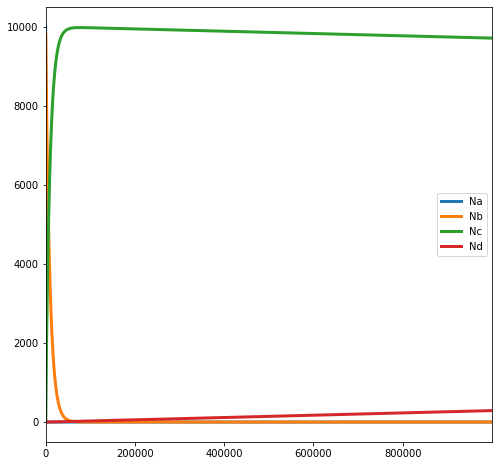

In [197]:
result = pd.read_csv("%s/practice_P95_4th.txt"%data, sep='\t',header=None,engine="python")

plt.figure(figsize=(8,8))
plt.xlim(result[0].min(),result[0].max())
plt.plot(result[0],result[1],linewidth=3,label = "Na")
plt.plot(result[0],result[2],linewidth=3,label = "Nb")
plt.plot(result[0],result[3],linewidth=3,label = "Nc")
plt.plot(result[0],result[4],linewidth=3,label = "Nd")
plt.legend()

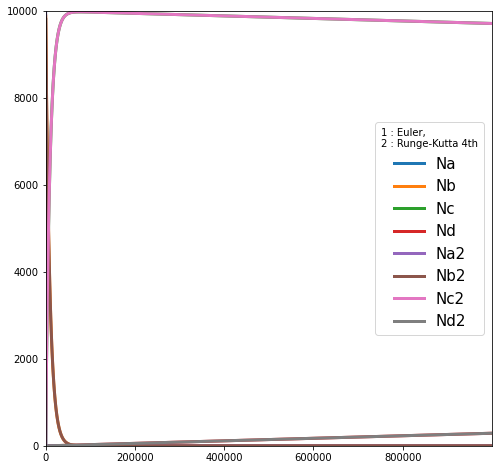

In [199]:
result = pd.read_csv("%s/practice_P95.txt"%data, sep='\t',header=None,engine="python")

plt.figure(figsize=(8,8))
plt.xlim(result[0].min(),result[0].max())
plt.ylim(0,result[1].max() ) 
plt.plot(result[0],result[1],linewidth=3,label = "Na")
plt.plot(result[0],result[2],linewidth=3,label = "Nb")
plt.plot(result[0],result[3],linewidth=3,label = "Nc")
plt.plot(result[0],result[4],linewidth=3,label = "Nd")

result3 = pd.read_csv("%s/practice_P95_4th.txt"%data, sep='\t',header=None,engine="python")
plt.plot(result3[0],result3[1],linewidth=3,label = "Na2")
plt.plot(result3[0],result3[2],linewidth=3,label = "Nb2")
plt.plot(result3[0],result3[3],linewidth=3,label = "Nc2")
plt.plot(result3[0],result3[4],linewidth=3,label = "Nd2")
plt.legend(title=f"1 : Euler, \n2 : Runge-Kutta 4th",fontsize=15, title_fontsize=10)
